In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from msfm.utils import redshift, files

In [3]:
conf = files.load_config("/Users/arne/git/multiprobe-simulation-forward-model/configs/v14/extended.yaml")
z0 = conf["analysis"]["modelling"]["z0"]

[(0.0, 4.866027963161469)]

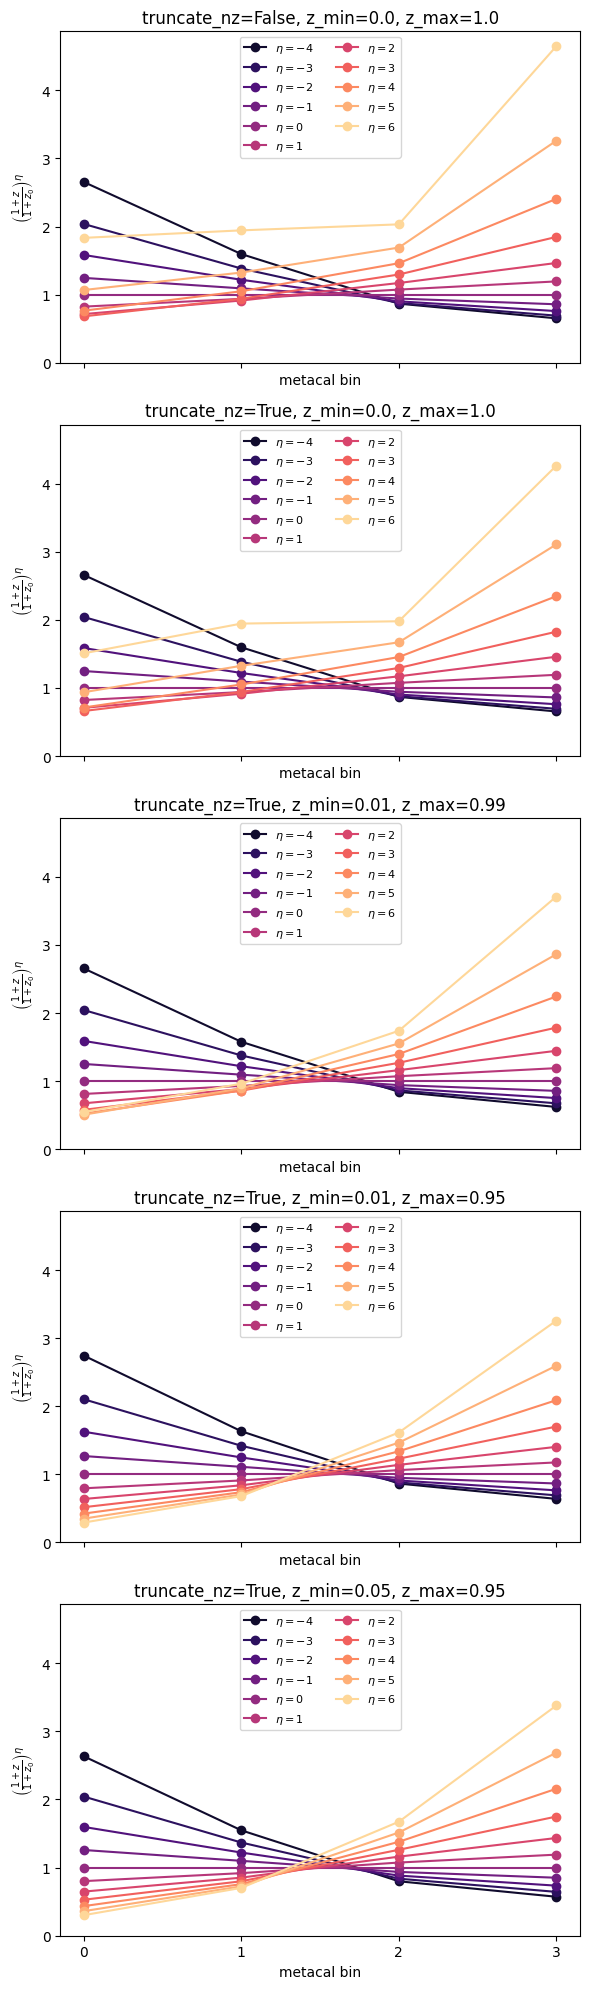

In [4]:
fig, ax = plt.subplots(nrows=5, figsize=(6, 4*5), sharex=True, sharey=True)

for i, (truncate_nz, z_min, z_max) in enumerate(zip(
    [False, True, True, True, True], [0.0, 0.0, 0.01, 0.01, 0.05], [1.0, 1.0, 0.99, 0.95, 0.95]
)):

    eta_range = np.arange(-4, 7)
    colors = sns.color_palette("magma", len(eta_range))
    for j, eta in enumerate(eta_range):
        tomo_Aia = redshift.get_tomo_amplitudes_according_to_config(
            conf, 1, eta, sample="metacal", truncate_nz=truncate_nz, z_min_quantile=z_min, z_max_quantile=z_max
        )
        ax[i].plot(tomo_Aia, marker="o", label=r"$\eta={}$".format(eta), color=colors[j])
    ax[i].set(
        xlabel="metacal bin",
        ylabel=r"$\left(\frac{1 + z}{1 + z_0}\right)^\eta$",
        title=f"truncate_nz={truncate_nz}, z_min={z_min}, z_max={z_max}",
    )
    ax[i].legend(loc="upper center", fontsize=8, ncol=2)
    ax[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    fig.tight_layout()

ax[0].set(ylim=(0, None))

In [5]:
original = redshift.get_tomo_amplitudes_according_to_config(
    conf, 1, 3, sample="metacal", truncate_nz=True, z_min_quantile=0.05, z_max_quantile=0.95
)
print(original)

vectorized = redshift.get_tomo_amplitudes_according_to_config_vectorized(
    conf, 1, 3, sample="metacal", truncate_nz=True, z_min_quantile=0.05, z_max_quantile=0.95
)
print(vectorized)

[0.5283708 0.7993388 1.2615547 1.749587 ]
[0.5283708 0.7993388 1.2615547 1.749587 ]


In [6]:
redshift.get_tomo_amplitudes_according_to_config_vectorized(
    conf, np.array([1]*100), np.array([3]*100), sample="metacal", truncate_nz=True, z_min_quantile=0.05, z_max_quantile=0.95
)

array([[0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749587 ],
       [0.5283708, 0.7993388, 1.2615547, 1.749

In [7]:
vectorized

array([0.5283708, 0.7993388, 1.2615547, 1.749587 ], dtype=float32)

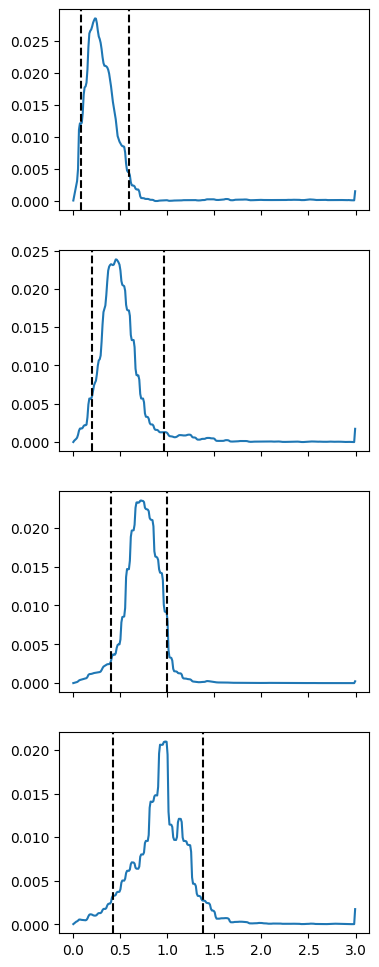

In [8]:
z, nz = files.load_redshift_distributions("metacal", conf)
z = np.stack(z, axis=0)
nz = np.stack(nz, axis=0)

# z = z[:, :-10]
# nz = nz[:, :-10]

nz = nz / np.sum(nz, axis=1, keepdims=True)

cdf = np.cumsum(nz, axis=1)

n_z_bins = 4

fig, ax = plt.subplots(nrows=n_z_bins, sharex=True, figsize=(4, 12))
for i in range(n_z_bins):
    z_01 = np.interp(0.05, cdf[i], z[i])
    # z_01 = np.interp(0.01, cdf[i], z[i])
    z_99 = np.interp(0.95, cdf[i], z[i])

    ax[i].plot(z[i], nz[i])
    ax[i].axvline(z_01, color='k', linestyle='--')
    ax[i].axvline(z_99, color='k', linestyle='--')

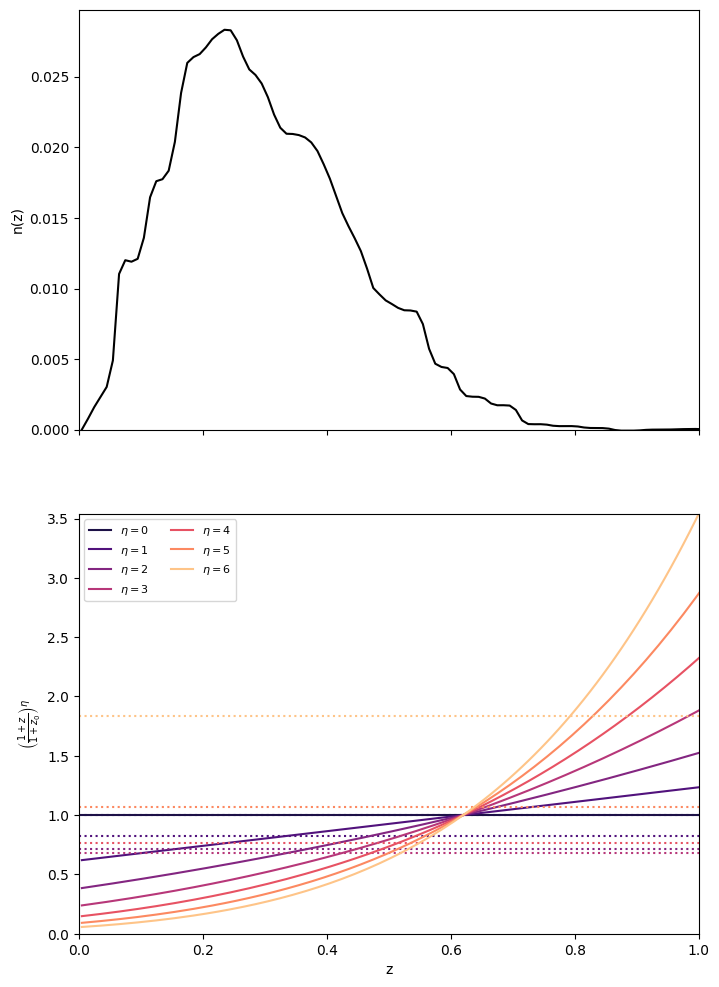

In [9]:
z, nz = files.load_redshift_distributions("metacal", conf)
z = np.stack(z, axis=0)
nz = np.stack(nz, axis=0)

i_z = 0

z_max_nz = 1.0
z_min, z_max = 0, 1

power_law = lambda z, eta: ((1 + z)/(1 + z0))**eta

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8, 12))

ax[0].plot(z[i_z], nz[i_z], color="k")
ax[0].set(ylabel="n(z)", ylim=(0, None))

colors = sns.color_palette("magma", 7)
for i, eta in enumerate(np.arange(0, 7)):
    ax[1].plot(z[i_z], power_law(z[i_z], eta), color=colors[i], label=r"$\eta={}$".format(eta))
    ax[1].set(
        xlim=(z_min, z_max), 
        xlabel="z",
        ylabel=r"$\left(\frac{1 + z}{1 + z_0}\right)^\eta$"
    )

    tomo_Aia_high = redshift.get_tomo_amplitudes_according_to_config(conf, np.array([1]), np.array([eta]), sample="metacal")
    ax[1].axhline(tomo_Aia_high[i_z], color=colors[i], linestyle=":")
ax[1].set(ylim=(z_min, power_law(z_max, 6)))
ax[1].legend(loc="upper left", fontsize=8, ncol=2)

# fig.savefig(f"redshift_evolution,z_max={z_max_nz}.png", bbox_inches="tight")

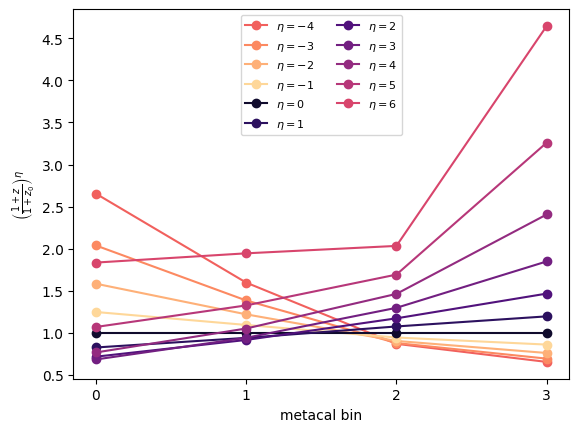

In [10]:
fig, ax = plt.subplots()

eta_range = np.arange(-4, 7)
colors = sns.color_palette("magma", len(eta_range))
for eta in eta_range:
    temp = redshift.get_tomo_amplitudes_according_to_config(conf, np.array([1]), np.array([eta]), sample="metacal")
    ax.plot(temp, marker="o", label=r"$\eta={}$".format(eta), color=colors[eta])
ax.set(xlabel="metacal bin", ylabel=r"$\left(\frac{1 + z}{1 + z_0}\right)^\eta$")
ax.legend(loc="upper center", fontsize=8, ncol=2)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
fig.savefig(f"redshift_evolution_bins,z_max={z_max_nz}.png", bbox_inches="tight")

# error estimate

In [11]:
z, nz = files.load_redshift_distributions("metacal", conf)
z = np.stack(z, axis=0)
nz = np.stack(nz, axis=0)

cdf = np.cumsum(nz, axis=1)

Aia = 1
eta_max = 2

i_z = 0

z_05 = np.interp(0.05, cdf[i_z], z[i_z])
z_95 = np.interp(0.95, cdf[i_z], z[i_z])

power_law = lambda z: ((1 + z)/(1 + z0))**eta_max

w_min = power_law(z_05)
w_max = power_law(z_95)

k = w_max / w_min
relative_error = (k - 1)/2

print(w_min, w_max)
print(relative_error)

0.45022185677615906 0.987513431478816
0.5966964582194718


# trash